# 🔹 Sabriya Sowers' Titanic Data Analysis 🔹

**Author:** Sabriya Sowers  
**Date:** October 30, 2025  

## Introduction
This project uses the Titanic dataset from the Seaborn library to explore key steps in data analysis.  
The workflow includes:
- Loading and inspecting the data  
- Identifying missing values  
- Summarizing key statistics  
- Exploring feature relationships through visualizations  
- Preparing the dataset for classification modeling  

## Section 1. Import and Inspect the Data

In [70]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Load dataset from seaborn
titanic = sns.load_dataset("titanic")

In [71]:
# Displays basic dataset info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [72]:
# Display first 10 rows
print(titanic.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

In [73]:
# Check for missing values
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
# Display summary statistics
print(titanic.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [75]:
# Check for correlations
print(titanic.corr(numeric_only=True))

            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


In [76]:
# Age stats
titanic["age"].describe()
titanic["age"].median()

np.float64(28.0)

### Reflection 1

**1. How many data instances are there?**  
891  

**2. How many features are there?**  
15  

**3. What are the names?**  
survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, and alone.  

**4. Are there any missing values?**  
Yes. Age has 177 missing values, embarked has 2, deck has 688, and embark_town has 2.  

**5. Are there any non-numeric features?**  
Yes, there are 2 boolean, 2 categorical, and 5 object-type features.  

**6. Are the data instances sorted on any of the attributes?**  
No.  

**7. What are the units of age?**  
Years.  

**8. What are the minimum, median, and maximum ages?**  
- Minimum: 0.42  
- Median: 28  
- Maximum: 80  

**9. What two different features have the highest correlation?**  
The strongest relationships are between family members traveling together (sibsp and parch) and lower survival among adult males (adult_male and survived).  

**10. Are there any categorical features that might be useful for prediction?**  
Yes. Survival (y) could be predicted using features like sex, age, parch, and passenger class.

### 2.1 Explore Data Patterns and Distributions

### Scatter Matrix: Age, Fare, and Passenger Class

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='fare', ylabel='age'>,
        <Axes: xlabel='pclass', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='fare'>,
        <Axes: xlabel='fare', ylabel='fare'>,
        <Axes: xlabel='pclass', ylabel='fare'>],
       [<Axes: xlabel='age', ylabel='pclass'>,
        <Axes: xlabel='fare', ylabel='pclass'>,
        <Axes: xlabel='pclass', ylabel='pclass'>]], dtype=object)

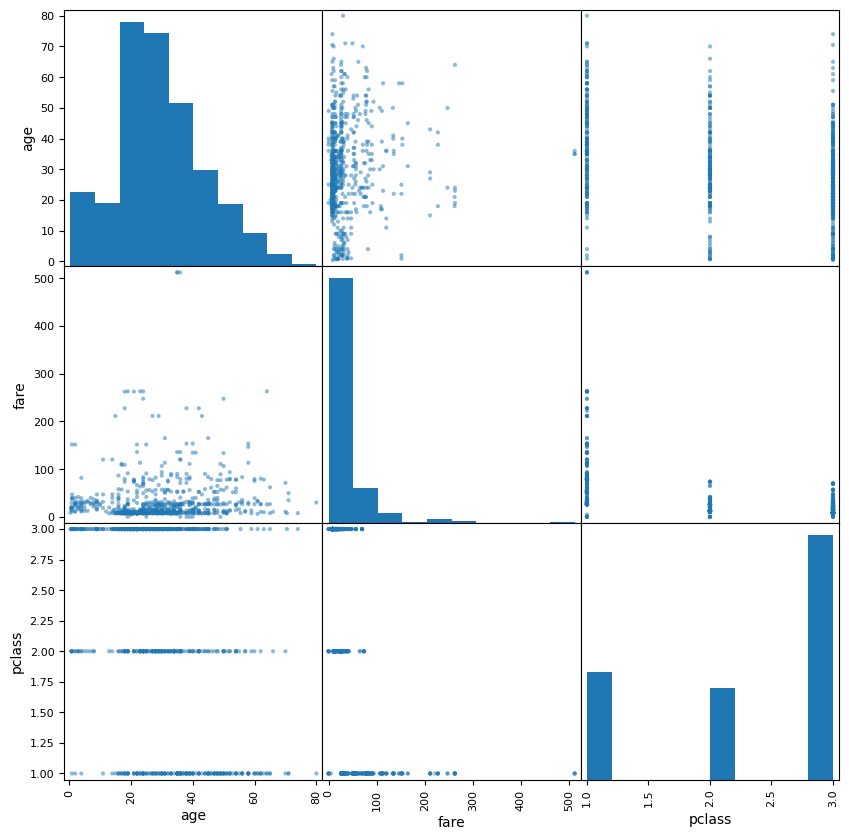

In [77]:
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))

### Create a scatter plot of age vs fare, colored by gender

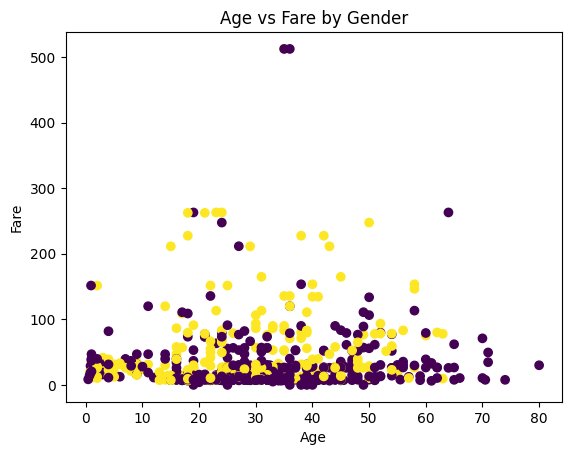

In [78]:
plt.scatter(titanic['age'], titanic['fare'], c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1))
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.show()

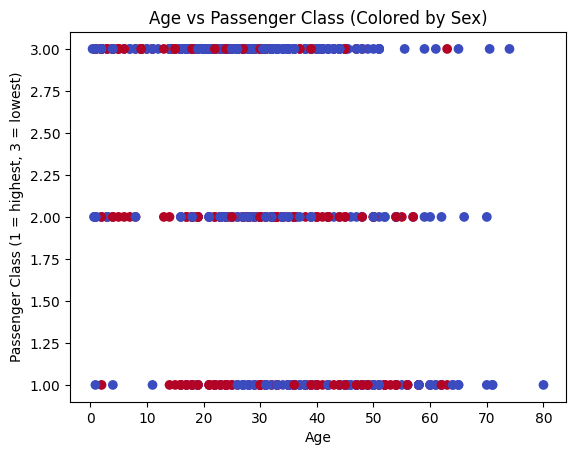

In [79]:
colors = titanic['sex'].apply(lambda x: 0 if x == 'male' else 1)
plt.scatter(titanic['age'], titanic['pclass'], c=colors, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Passenger Class (1 = highest, 3 = lowest)')
plt.title('Age vs Passenger Class (Colored by Sex)')
plt.show()


### Histogram Of Age

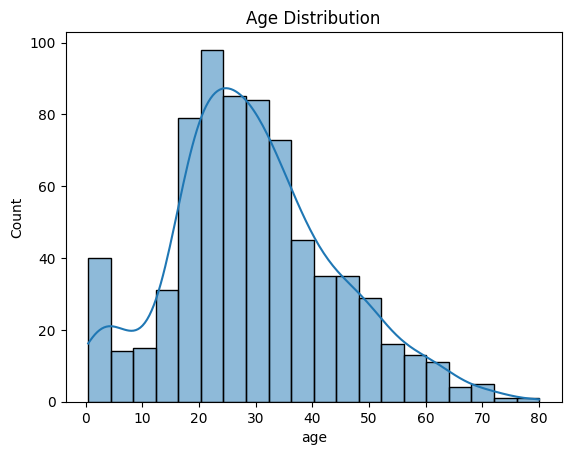

In [80]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Create a count plot for class and survival

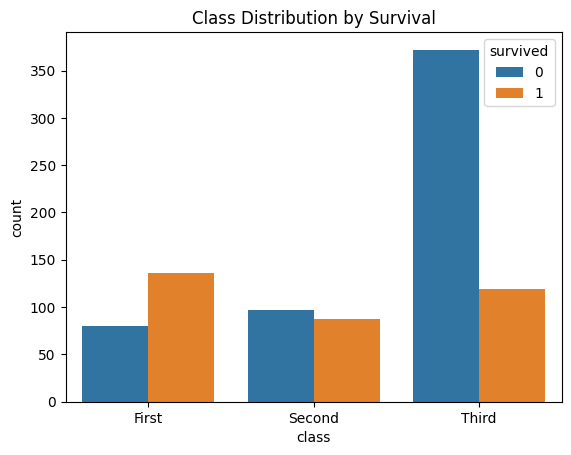

In [81]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### Reflection 2.1

**1. What patterns or anomalies do you notice?**  
- The scatter plots show that passengers from all age groups paid a wide range of fares, but most fares were low. Younger passengers are concentrated in lower fare ranges.  
- In the “Age vs Passenger Class” plot, most people traveled in 3rd class — especially younger adults and children.  
- The “Class Distribution by Survival” plot shows that 1st class passengers had much higher survival rates than those in 3rd class.  

**2. Do any features stand out as potential predictors?**  
Yes. Passenger class, sex, and age stand out as strong predictors of survival.  
The visual patterns show that being in a higher class and being female were associated with better survival outcomes.  

**3. Are there any visible class imbalances?**  
Yes. There are more 3rd class passengers compared to 1st or 2nd class.  
This imbalance may affect model training since the survival rate in 3rd class is much lower, which could skew the model toward predicting non-survival.

### 2.2 Handle Missing Values and Clean Data

In [82]:
# Fill missing values in the Titanic dataset
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

titanic['embark_town'] = titanic['embark_town'].fillna(
    titanic['embark_town'].mode()[0]
)

In [83]:
# Creating / modifying columns in the DataFrame. When ran in this cell work happens behind the scenes.
# Create a new feature: Family size
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

#Convert categorical data to numeric:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

#Create a binary feature for 'alone':
titanic['alone'] = titanic['alone'].astype(int)

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,0,22.0,1,0,7.2500,2.0,Third,man,True,NaN,Southampton,no,0,2
1,1,1,1,38.0,1,0,71.2833,0.0,First,woman,False,C,Cherbourg,yes,0,2
2,1,3,1,26.0,0,0,7.9250,2.0,Third,woman,False,NaN,Southampton,yes,1,1
3,1,1,1,35.0,1,0,53.1000,2.0,First,woman,False,C,Southampton,yes,0,2
4,0,3,0,35.0,0,0,8.0500,2.0,Third,man,True,NaN,Southampton,no,1,1


### Reflection 2.3

1. **Why might family size be a useful feature for predicting survival?** 
Family size can indicate whether a passenger was traveling alone or with others, which likely affected their chances of survival. People traveling with family members may have helped each other find lifeboats or stay together during the evacuation, while those alone might have had fewer opportunities for help.
   
2. **Why convert categorical data to numeric?**
Most machine learning models can only work with numbers, not words. Turning categories like sex or embarked into numbers lets the model understand and use that information when learning patterns in the data.

## Section 3. Feature Selection and Justification

### 3.1 Choose Features and Target
For this classification task, the goal is to predict whether a passenger **survived** the Titanic disaster.  

### Target Variable (y)
**`survived`** — indicates if the passenger lived (`1`) or did not survive (`0`).

### Input Features (X)
  **`age`** older passengers may have had lower survival rates.  
- **`fare`** higher fares often indicate higher-class cabins with better access to lifeboats.  
- **`pclass`** passenger class (1st, 2nd, or 3rd) reflects socioeconomic status and survival likelihood.  
- **`sex`** gender played a major role due to the "women and children first" policy.  
- **`family_size`** passengers traveling with family may have influenced each other's survival chances.  

### Justification
These features combine both **demographic** (`age`, `sex`, `family_size`) and **socioeconomic** (`fare`, `pclass`) factors that strongly influenced survival outcomes, making them useful predictors for this classification model.

### 3.2 Define Features (X) and Target (y)
The selected input features and target variable are defined below.  
`X` contains the predictors, and `y` contains the outcome we want to predict.

X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived']

### Reflection 3
1. **Why are these features selected?**  
   These features were chosen because they represent key factors that may influence survival on the Titanic.  
   - **Age** and **sex** capture demographic differences that affected who may have received help first.  
   - **Fare** and **pclass** reflect socioeconomic status and easy access to lifeboats.  
   - **Family size** helps show whether traveling alone or with others can affect survival chances.

2. **Are there any features that are likely to be highly predictive of survival?** Yes. 
   **Sex** and **pclass** are likely to be the most predictive. Women and passengers in higher classes had much better survival rates due to social and easier access to evacuation methods.

## Section 4. Splitting
Comparing the difference between the training and test sets using train_test_split first and StratifiedShuffleSplit second.

### Basic Train/Test split
Randomly splits 80% of the rows into training and 20% into test.

In [84]:
# Target variable: survived (1 = lived, 0 = died)
y = titanic['survived']

# Feature matrix: predictors we chose
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]

In [85]:
# Split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=123
)

# Display dataset sizes
print("Basic split:")
print("  Train size:", len(X_train))
print("  Test size:", len(X_test))


Train size: 712
Test size: 179
Basic split:
  Train size: 712
  Test size: 179


### Stratified Train/Test split
Randomly splits 80% of the data into a training set and 20% into a test set, **while keeping the same proportion of the target variable (`survived`) in both sets**. This ensures that the survival ratio remains consistent between training and test data, leading to a more reliable model evaluation.

In [ ]:
# Split the data into training and test sets (80/20 split)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    train_set = X.iloc[train_indices]
    test_set = X.iloc[test_indices]

# Display dataset sizes
print('Train size:', len(train_set))
print('Test size:', len(test_set))

Train size: 712
Test size: 179


### Compare Results

In [87]:
print("Original Class Distribution:\n", y.value_counts(normalize=True))
print("Train Set Class Distribution:\n", train_set['pclass'].value_counts(normalize=True))
print("Test Set Class Distribution:\n", test_set['pclass'].value_counts(normalize=True))

Original Class Distribution:
 survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
Train Set Class Distribution:
 pclass
3    0.561798
1    0.227528
2    0.210674
Name: proportion, dtype: float64
Test Set Class Distribution:
 pclass
3    0.508380
1    0.301676
2    0.189944
Name: proportion, dtype: float64


### Reflection 4
1. **Why might stratification improve model performance?**  
   Stratification helps keep the same balance of people who survived and didn’t survive in both the training and test sets. This makes the model more accurate since both sets represent the data fairly.

2. **How close are the training and test distributions to the original dataset?**  
   They are pretty close. Around 62% didn’t survive and 38% did, and the training and test sets have about the same numbers.

3. **Which split method produced better class balance?**  
   The stratified split worked better because it kept the same survival ratio in both sets, while the regular split might not always do that.